<a href="https://colab.research.google.com/github/williamjsmith15/Conversions/blob/master/NNinPythonWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Hello World')

Hello World


This is a text cell :)

In [4]:
!wget https://www.dropbox.com/s/qbt6rcwglok3xpw/chest_xrays.zip

--2022-12-05 13:32:33--  https://www.dropbox.com/s/qbt6rcwglok3xpw/chest_xrays.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/qbt6rcwglok3xpw/chest_xrays.zip [following]
--2022-12-05 13:32:33--  https://www.dropbox.com/s/raw/qbt6rcwglok3xpw/chest_xrays.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucec953ea48d52421351e30161db.dl.dropboxusercontent.com/cd/0/inline/ByArtqQZ8-7Y9qqCySgaTQ6M62ychoMGu4noewRpsyKFpaPAGhg-vSFQYiuQ11tnO3duagIuTK4LPnJgI-rXGDZPRahjr13Zogd5HI7S2srTIhLkMZXHXh6wRqKzN5GMDFHxKNaoNZlUDCDtUVZCEt8GVnLomTEkkwpu_Z1rkRAhKQ/file# [following]
--2022-12-05 13:32:34--  https://ucec953ea48d52421351e30161db.dl.dropboxusercontent.com/cd/0/inline/ByArtqQZ8-7Y9qqCySgaTQ6M62ychoMGu4noewRpsyKFpaPAGhg-vSFQYiuQ11tnO3dua

In [5]:
!unzip chest_xrays.zip

Archive:  chest_xrays.zip
   creating: chest_xrays/
   creating: chest_xrays/effusion/
  inflating: chest_xrays/effusion/e132.png  
  inflating: chest_xrays/effusion/e126.png  
  inflating: chest_xrays/effusion/e318.png  
  inflating: chest_xrays/effusion/e330.png  
  inflating: chest_xrays/effusion/e324.png  
  inflating: chest_xrays/effusion/e287.png  
  inflating: chest_xrays/effusion/e293.png  
  inflating: chest_xrays/effusion/e278.png  
  inflating: chest_xrays/effusion/e244.png  
  inflating: chest_xrays/effusion/e250.png  
  inflating: chest_xrays/effusion/e21.png  
  inflating: chest_xrays/effusion/e35.png  
  inflating: chest_xrays/effusion/e34.png  
  inflating: chest_xrays/effusion/e20.png  
  inflating: chest_xrays/effusion/e251.png  
  inflating: chest_xrays/effusion/e245.png  
  inflating: chest_xrays/effusion/e279.png  
  inflating: chest_xrays/effusion/e292.png  
  inflating: chest_xrays/effusion/e286.png  
  inflating: chest_xrays/effusion/e325.png  
  inflating: ches

Now we've imported the data, create list of filepaths that are eiher paths of normal / effusion x-rays to access later

In [6]:
# The glob module finds all the pathnames matching a specified pattern
from glob import glob
import os

# If your dataset is compressed, unzip with:
# !unzip chest_xrays.zip

# Define folders containing images
data_path = os.path.join("chest_xrays")
effusion_path = os.path.join(data_path, "effusion", "*.png")
normal_path = os.path.join(data_path, "normal", "*.png")

# Create list of files
effusion_list = glob(effusion_path)
normal_list = glob(normal_path)

print('Number of cases with pleural effusion: ', len(effusion_list)) 
print('Number of normal cases: ', len(normal_list))

Number of cases with pleural effusion:  350
Number of normal cases:  350


# Visualising the X-rays

In the previous section, we set up a dataset comprising 700 chest X-rays. Half of the X-rays are labelled “normal” and half are labelled as “pleural effusion”. Let’s take a look at some of the images. - OpenCV is a computer vision library for this kinda thing

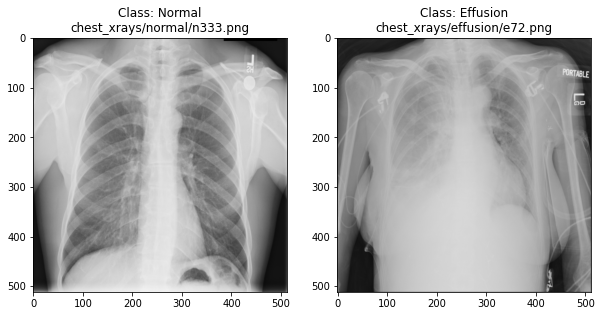

In [7]:
# cv2 is openCV, a popular computer vision library
import cv2
from matplotlib import pyplot as plt 
import random

def plot_example(example, label, loc):
    image = cv2.imread(example)
    im = ax[loc].imshow(image)
    title = f"Class: {label}\n{example}"
    ax[loc].set_title(title)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 10)

# Plot a "normal" record
plot_example(random.choice(normal_list), "Normal", 0)

# Plot a record labelled with effusion
plot_example(random.choice(effusion_list), "Effusion", 1)

# First Classification

Here we randomly classify the dataset as effusion or normal

Effusion or not?


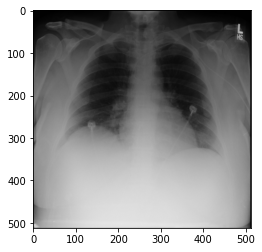

In [8]:
print("Effusion or not?")

# flip a coin
coin_flip = random.choice(["Effusion", "Normal"])
if coin_flip == "Normal":
    fn = random.choice(normal_list)
else:
    fn = random.choice(effusion_list)

# plot the image
image = cv2.imread(fn)
plt.imshow(image)

In [9]:
# Jupyter doesn't allow us to print the image until the cell has run,
# so we'll print in a new cell.
print(f"The answer is: {coin_flip}!")

The answer is: Normal!


# Computer Visualisation of Images

In [14]:
import numpy as np 

file_idx = 55
example = normal_list[file_idx]
image = cv2.imread(example)

print(image.shape)

(512, 512, 3)


see that there is 3D to image array - RGB

In [15]:
image = cv2.imread(example, cv2.IMREAD_GRAYSCALE)
print(image.shape)

(512, 512)


make it 1D by greyscale and then print out a bit of it

[[23 22 22 21 21 21 21 20 19 19]
 [22 21 20 20 20 19 20 20 19 18]
 [20 20 20 19 19 19 18 18 17 17]
 [20 19 19 18 18 18 17 18 16 17]
 [18 18 18 17 17 16 17 16 17 22]
 [17 17 17 16 16 16 20 30 47 63]
 [17 16 16 19 27 41 56 68 76 83]
 [19 26 38 51 62 72 79 85 90 95]
 [47 57 65 73 79 84 91 93 96 96]
 [69 74 80 85 89 92 94 93 93 93]]


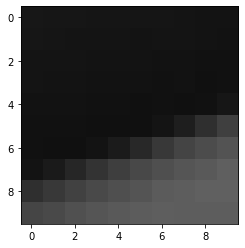

In [20]:
# Print a 10 by 10 chunk of the matrix
print(image[35:45, 40:50])
# Plot the same chunk as an image
plt.imshow(image[35:45, 40:50], cmap='gray', vmin=0, vmax=255)

# Image Pre-Processing

loading all of the images and corresponding labels and assigning them to a list

In [21]:
# create a list of effusion images and labels
dataset_effusion = [cv2.imread(fn, cv2.IMREAD_GRAYSCALE) for fn in effusion_list]
label_effusion = np.ones(len(dataset_effusion))

# create a list of normal images and labels
dataset_normal = [cv2.imread(fn, cv2.IMREAD_GRAYSCALE) for fn in normal_list]
label_normal = np.zeros(len(dataset_normal))

# Combine the lists
dataset = dataset_effusion + dataset_normal
labels = np.concatenate([label_effusion, label_normal])

And downsample & normalise data

In [22]:
# Downsample the images from (512,512) to (256,256)
dataset = [cv2.resize(img, (256,256)) for img in dataset]

# Check the size of the reshaped images
print(dataset[0].shape)

# Normalize the data
# Subtract the mean, divide by the standard deviation.
for i in range(len(dataset)):
  dataset[i] = (dataset[i] - np.average(dataset[i], axis= (0, 1))) / np.std(dataset[i], axis= (0, 1)) 

(256, 256)


In [23]:
dataset = np.asarray(dataset, dtype=np.float32) #List to array
print(f"Matrix Dimensions: {dataset.shape}")

Matrix Dimensions: (700, 256, 256)


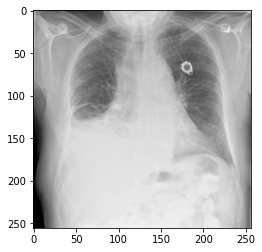

In [26]:
idx = 5
vals = dataset[idx].flatten()
plt.imshow(dataset[idx], cmap='gray', vmin=min(vals), vmax=max(vals))

# Data Preparation Section

# Partition into a Training and Testing Set

Here we've taken a random set but specified the random state of python (so that we can reproduce the same split to help for repeatability of results in the future)

In [27]:
from sklearn.model_selection import train_test_split

# Our Tensorflow model requires the input to be:
# [batch, height, width, n_channels]
# So we need to add a dimension to the dataset and labels.
# 
# Ellipsis (...) is shorthand for selecting with ":" across dimensions. 
# np.newaxis expands the selection by one dimension.
dataset = dataset[..., np.newaxis]
labels = labels[..., np.newaxis]

# Create training and test sets
dataset_train, dataset_test, labels_train, labels_test = train_test_split(dataset, labels, test_size=0.15, random_state=42)

# Create a validation set
dataset_train, dataset_val, labels_train, labels_val = train_test_split(dataset_train, labels_train, test_size=0.15, random_state=42)

print("No. images, x_dim, y_dim, colors) (No. labels, 1)\n")
print(f"Train: {dataset_train.shape}, {labels_train.shape}")
print(f"Validation: {dataset_val.shape}, {labels_val.shape}")
print(f"Test: {dataset_test.shape}, {labels_test.shape}")

No. images, x_dim, y_dim, colors) (No. labels, 1)

Train: (505, 256, 256, 1), (505, 1)
Validation: (90, 256, 256, 1), (90, 1)
Test: (105, 256, 256, 1), (105, 1)


# Data augmentation
Basically don't want to overfit model => artificially increase the size of the data set with this - basically apply random transformations to have more images

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define what kind of transformations we would like to apply
# such as rotation, crop, zoom, position shift, etc
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    zoom_range=0,
    horizontal_flip=False)

Look at some of the augmented images

Found 700 images belonging to 2 classes.


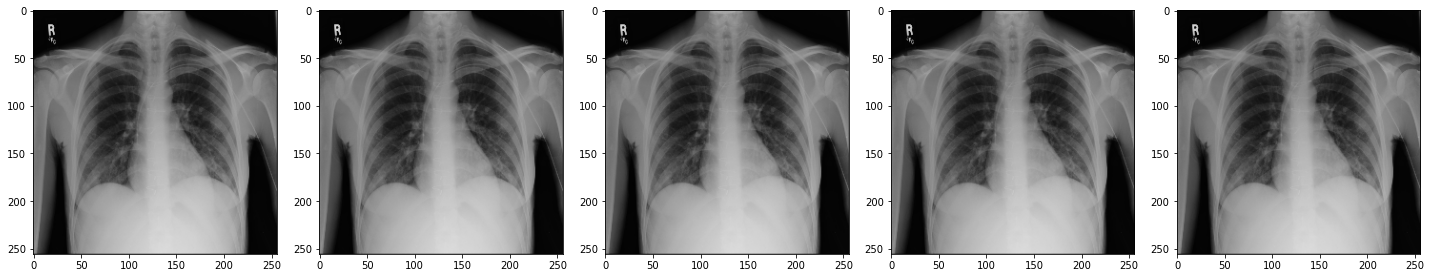

In [32]:
# specify path to source data
path = os.path.join("chest_xrays")
batch_size=5

val_generator = datagen.flow_from_directory(
        path, color_mode="rgb",
        target_size=(256, 256),
        batch_size=batch_size)

def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img.astype('uint8'))
    plt.tight_layout()
    plt.show()

augmented_images = [val_generator[0][0][0] for i in range(batch_size)]
plot_images(augmented_images)